$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
\let\bs\boldsymbol
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\mathbb R}}
\def\DD{{\mathbb D}}
\def\GG{{\mathbb G}}
\def\CC{{\mathbb C}}
\def\MM{{\mathbb M}}
\def\JJ{{\mathbb J}}
\def\WW{{\mathbb W}}
\def\HH{{\mathbb H}}
\def\SS{{\mathbb S}}
\def\QQ{{\mathbb Q}}
\def\BB{{\mathbb B}}
\def\grad{\tn{grad}\,}
\def\curl{\tn{curl}\,}
\def\unit{\mathbb 1}
\def\div{\tn{div}\,}
\def\Im{\tn{Im}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\bf #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
\newcommand{\ds}[1]{\frac{\mathrm d #1}{\mathrm ds}}
$$

# Volume-preserving splitting methods
## Introduction

We consider the dynamics of a charged particle in a static electromagnetic field $(\bold E, \bold B)$:

$$
\be \label{sys}
\begin{aligned}
 \dt{\bold x(t)} &= \bold v(t) \,, && \bold x(0) = \bold v_0\,,
 \\[1mm]
 \dt{\bold v(t)} &= \bold E(\bold x(t)) + \bold v(t) \times \bold B(\bold x(t))\,, && \bold v(0) = \bold v_0\,.
\end{aligned}
\ee
$$

Here, $\bold x=x \,\bold e_x + y\, \bold e_y + z\, \bold e_z$ in Cartesian position coordinates. The fields $\bold E$ and $\bold B$ will be prescribed in curvilinear coordinates introduced below. We consider two cases:

$$
\ba
    &\bold B = R\,\bold e_z\,,\quad&&\bold E = \frac{2\cdot10^{-2}}{R^2}\,\bold e_R\,,&\tn{(cylindrical\ coordinates),}  \label{fields1}
 \\[1mm]
    &\bold B = \frac{r}{2R} \bold e_\theta + \frac{1}{R}\bold e_\varphi\,,\quad &&\bold E = 0\,,&\tn{(toroidal\ coordinates)}\,.  \label{fields2}
\ea
$$
    
We will test different numerical solution methods for the system \eqref{sys}, such as 4th-order Runge Kutta, 1st-, 2nd-, 4th- and 6-th order volume preserving splitting methods.

## Cylindrical and toroidal coordinates

Cylindrical coordinates $(R, \xi, z)$ are defined by

$$
\be
F_c:\,(R,\xi,z) \mapsto (x,y,z),\quad
 \begin{pmatrix}
 x \\ y \\ z
 \end{pmatrix} 
 =
 \begin{pmatrix}
 R \cos \xi \\ R \sin \xi \\ z
 \end{pmatrix}\,,
 \qquad\quad
 F_c^{-1}:\,(x,y,z) \mapsto (R,\xi,z),\quad
 \begin{pmatrix}
 R \\ \xi \\ z
 \end{pmatrix} 
 =
 \begin{pmatrix}
 \sqrt{x^2 + y^2} \\ \arctan \frac{y}{x} \\ z
 \end{pmatrix}
 \,.
\ee
$$

The Jacobian and its determinant read

$$
\be
 DF_c = \begin{pmatrix}
 \cos \xi & - R \sin \xi & 0
 \\
 \sin \xi & R \cos \xi & 0
 \\
 0 & 0 & 1 
 \end{pmatrix}\,,\qquad \det DF_c = R\,.
\ee
$$

The columns of the Jacobian are the _covariant basis vectors_ of the cylindrical coordinates:

$$
\ba
 \bs \pa_R &:= \begin{pmatrix}
 \cos \xi \\ \sin \xi \\ 0
 \end{pmatrix}
 =
 \frac{1}{R}
 \begin{pmatrix}
 x \\ y \\ 0
 \end{pmatrix}\,, \qquad &&\bold e_R := \bs \pa_R\,,
 \\[1mm]
 \bs \pa_\xi &:= \begin{pmatrix}
 -R \sin \xi \\ R \cos \xi \\ 0
 \end{pmatrix}
 =
 \begin{pmatrix}
 -y \\ x \\ 0
 \end{pmatrix}\,, \qquad &&\bold e_\xi := \frac{\bs \pa_\xi}{R}\,,
 \\[1mm]
 \bs \pa_z &:= \begin{pmatrix}
 0 \\ 0 \\ 1
 \end{pmatrix}\,, \qquad &&\bold e_z := \bs \pa_z\,.
\ea
$$

An element $\dot{\bold x} \in T\RR^3$ of the tangent bundle with components $\dot{\bold x} = (\dot x, \dot y, \dot z)$ transforms via the Jacobian $DF_c$ as

$$
\be
 \begin{pmatrix}
 \dot x \\ \dot y \\ \dot z
 \end{pmatrix}
 =
 \begin{pmatrix}
 \cos \xi & - R \sin \xi & 0
 \\
 \sin \xi & R \cos \xi & 0
 \\
 0 & 0 & 1 
 \end{pmatrix}
 \begin{pmatrix}
 \dot R \\ \dot \xi \\ \dot z
 \end{pmatrix} \,.
\ee
$$

Primitive toroidal coordinates $(r, \theta, \varphi)$ are defined by

$$
\ba
F_t:\,(r,\theta,\varphi) \mapsto (x,y,z),\quad
 \begin{pmatrix}
 x \\ y \\ z
 \end{pmatrix} 
 &=
 \begin{pmatrix}
 (R_0 + r \cos \theta) \cos \varphi \\ -(R_0 + r \cos \theta)\sin \varphi \\ r \sin \theta
 \end{pmatrix}\,,
 \\[1mm]
 F_t^{-1}:\,(x,y,z) \mapsto (r,\theta,\varphi),\quad
 \begin{pmatrix}
 r \\ \theta \\ \varphi
 \end{pmatrix} 
 &=
 \begin{pmatrix}
 \sqrt{(R-R_0)^2 + z^2} \\ \arctan \frac{z}{R-R_0} \\ -\xi
 \end{pmatrix}
 \,,
\ea
$$

where $R$ and $\xi$ are the cylindrical coordinates from above, $R_0$ denotes the _major radius_ of the torus, $\theta$ stands for the _poloidal angle_ and $\varphi$ is called the _toroidal angle_.  The following picture provides some 
orientation, albeit with slightly different notation:

<img src="pics/toroidal_coords.png" width=500 />

In this illustration of primitive toroidal coordinates the radial coordinate is $r_0 \equiv r$, the poloidal angle is denoted by $\theta_0 \equiv \theta$ and the toroidal angle as $\zeta_0 \equiv \vphi$.

Using $R_0 + r \cos \theta = R$, the Jacobian and its determinant read

$$
\be
 DF_t = \begin{pmatrix}
 \cos \theta \cos \varphi & - r \sin \theta \cos \varphi & - R \sin \varphi 
 \\
 -\cos \theta \sin \varphi & r \sin \theta \sin \varphi & - R \cos \varphi 
 \\
 \sin \theta & r \cos \theta & 0
 \end{pmatrix}\,,\qquad \det DF_t = R\,.
\ee
$$

The columns of the Jacobain are the covariant basis vectors of the toroidal coordinates. With $\sin \theta = \frac{z}{r}$ as well as  $\cos \varphi = \frac{x}{R}$ and $\sin \varphi = -\frac{y}{R}$ we obtain

$$
\ba
 \bs \pa_r &:= \begin{pmatrix}
 \cos \theta \cos \varphi 
 \\
 -\cos \theta \sin \varphi 
 \\
 \sin \theta
 \end{pmatrix}
 =
 \frac{1}{r R}
 \begin{pmatrix}
 x(R - R_0) \\ -y(R - R_0) \\ zR
 \end{pmatrix}\,, \qquad &&\bold e_r := \bs \pa_r\,,
 \\[1mm]
 \bs \pa_\theta &:= \begin{pmatrix}
 - r \sin \theta \cos \varphi 
 \\
  r \sin \theta \sin \varphi 
 \\
  r \cos \theta 
 \end{pmatrix}
 =
 \frac{1}{R}
 \begin{pmatrix}
 -x z \\ -yz \\ R(R - R_0)
 \end{pmatrix}\,, \qquad &&\bold e_\theta := \frac{\bs \pa_\theta}{r}\,,
 \\[1mm]
 \bs \pa_\varphi &:= \begin{pmatrix}
 - (R_0 + r \cos \theta) \sin \varphi  \\ - (R_0 + r \cos \theta) \cos \varphi  \\ 0
 \end{pmatrix}
 =
 \begin{pmatrix}
 - y \\ x \\ 0
 \end{pmatrix}\,, \qquad &&\bold e_\varphi := \frac{\bs \pa_\varphi}{R}\,.
\ea
$$

An element $\dot{\bold x} \in T\RR^3$ of the tangent bundle with components $\dot{\bold x} = (\dot x, \dot y, \dot z)$ transforms via the Jacobian $DF_t$ as

$$
\be
  \begin{pmatrix}
 \dot x \\ \dot y \\ \dot z
 \end{pmatrix}
 =
 \begin{pmatrix}
 \cos \theta \cos \varphi & - r \sin \theta \cos \varphi & - R \sin \varphi 
 \\
 -\cos \theta \sin \varphi & r \sin \theta \sin \varphi & - R \cos \varphi 
 \\
 \sin \theta & r \cos \theta & 0
 \end{pmatrix}
 \begin{pmatrix}
 \dot r \\ \dot \theta \\ \dot \varphi
 \end{pmatrix} \,.
\ee
$$

We are now able to express the fields \eqref{fields1} and \eqref{fields2} in Cartesian coordinates:

$$
\ba
    &\bold B = R\,\bold e_z\,,\quad&&\bold E = \frac{2\cdot10^{-2}}{R^3}\,( x\, \bold e_x + y\, \bold e _y )\,,
 \\[1mm]
    &\bold B = \frac{1}{2R^2} \big[(- xz - 2y)\,\bold e_x + ( - yz + 2x)\,\bold e_y + R(R - R_0)\, \bold e_z \big]\,,\quad &&\bold E = 0\,.
\ea
$$

## Configuration space Lagrangian

The configuration space Lagrangian $L:T\RR^3 \to \RR$ is defined on the tangent bundle of the configuration space (or position space). For a charged particle in Cartesian coordinates described by the equations \eqref{sys}, with static fields, it reads

$$
\be
 L(\bold x, \dot{\bold x}) = \frac{|\dot{\bold x}|^2}{2} + \bold A(\bold x) \cdot \dot{\bold x} - \phi(\bold x)\,.
\ee
$$

Here, $\bold A$ and $\phi$ stand for the electromagnetic potentials such that

$$
\be
 \bold B = \nabla \times \bold A\,,\qquad \bold E = -\nabla \phi\,.
\ee
$$

The potentials corresponding to the fields \eqref{fields1} and \eqref{fields2} can be chosen as

$$
\ba
    &\bold A = \frac{R^2}{3}\,\bold e_\xi\,,\quad&&\phi = \frac{2\cdot10^{-2}}{R}\,,
 \\[1mm]
    &\bold A = \frac{z}{2R} \bold e_R + \frac{(R_0 - R)^2 + z^2}{4R} \bold e_\varphi - \frac{\ln R}{2}\bold e_z\,,\quad &&\phi = 0\,.  
\ea
$$

In the scalar product $\bold A \cdot \dot{\bold x}$ we write the tangent vector $\dot{\bold x}$ in the covariant basis and the linear form corresponding to $\bold A$ in the contravariant basis, hence

$$
\be
 \bold A \cdot \dot{\bold x} = A_x\,\dot x + A_y\,\dot y + A_z\,\dot z = A_R\,\dot R + A_\xi\,R\dot\xi + A_z\,\dot z = A_r\,\dot r + A_\theta\,r \dot \theta + A_\varphi\,R\dot \varphi\,.
\ee
$$

## Numerical schemes 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
# Define the fields for x in R^n, n>1
def E(x):
    #E1 = 2e-2*x[0]/(x[0]**2 + x[1]**2)**(3/2)
    #E2 = 2e-2*x[1]/(x[0]**2 + x[1]**2)**(3/2)
    #E3 = 0
    E1 = 0
    E2 = 0
    E3 = 0
    return np.array([E1, E2, E3])

R0 = 1. # major radius
def B(x):
    #B1 = 0
    #B2 = 0
    #B3 = (x[0]**2 + x[1]**2)**(1/2)
    B1 = 1./2./(x[0]**2 + x[1]**2)*( - x[0]*x[2] - 2.*x[1] )
    B2 = 1./2./(x[0]**2 + x[1]**2)*( - x[1]*x[2] + 2.*x[0] )
    B3 = 1./2./(x[0]**2 + x[1]**2)**(1/2)*( (x[0]**2 + x[1]**2)**(1/2) - R0 )
    return np.array([B1, B2, B3])

In [3]:
# Define the vector field for the RK solver:
def F(z, t):
    return np.hstack((z[3:], E(z[:3]) + np.cross(z[3:], B(z[:3]))))

# Runge-Kutta 4th order for dz/dt = F(z,t)
def RK4(z, t, dt):
    
    k1 = F(z, t)
    k2 = F(z + dt/2*k1, t + dt/2)
    k3 = F(z + dt/2*k2, t + dt/2)
    k4 = F(z + dt*k3, t + dt)
    
    return z + dt/6*k1 + dt/3*k2 + dt/3*k3 + dt/6*k4

In [4]:
# The basic flows corresponding to the split vector fields F_1, F_2 and F_3
def phi_1(dt, x, v):
    return x + dt*v

def phi_2(dt, x, v):
    return v + dt*E(x)

def phi_3ex(dt, x, v): # exact flow
    omega = -np.linalg.norm(B(x))
    b = -B(x)/omega
    return v + np.sin(omega*dt)*np.cross(b, v) + (1 - np.cos(omega*dt))*np.cross(b, np.cross(b, v)) 

def phi_3(dt, x, v): # approximate flow (implicit mid-point --> Boris)
    omega = -np.linalg.norm(B(x))
    b = -B(x)/omega
    return v + 4*dt*omega/(4 + dt**2*omega**2)*np.cross(b, v) + 2*(dt*omega)**2/(4 + dt**2*omega**2)*np.cross(b, np.cross(b, v))

In [5]:
# First and second order splitting schemes:
def SP1(dt, z, switch):
    # phi_3(dt)
    if switch == 'exact':
        v_m = phi_3ex(dt, z[:3], z[3:])
    else:
        v_m = phi_3(dt, z[:3], z[3:])

    # phi_2(dt)
    v = phi_2(dt, z[:3], v_m)

    # phi_1(dt)
    x = phi_1(dt, z[:3], v)
    
    return np.hstack((x, v))

def SP2(dt, z, switch):
    # phi_1(dt/2)
    x_h = phi_1(dt/2, z[:3], z[3:])

    # phi_2(dt/2)
    v_m = phi_2(dt/2, x_h, z[3:])

    # phi_3(dt)
    if flow_3 == 'exact':
        v_p = phi_3ex(dt, x_h, v_m)
    else:
        v_p = phi_3(dt, x_h, v_m)

    # phi_2(dt/2)
    v = phi_2(dt/2, x_h, v_p)

    # phi_1(dt/2)
    x = phi_1(dt/2, x_h, v)
    
    return np.hstack((x, v))

In [18]:
### Choose method
method = 'RK4'
#method = 'SP1'
#method = 'SP2'
#method = 'SP4'
flow_3 = 'not_exact'

# Time stepping
dt = np.pi/10.
steps = 500000

# Initial conditions
#x = np.array([0, -1, 0])
#v = np.array([0.1, 0.01, 0.])
x = np.array([1.05, 0., 0.])
v = np.array([0., 4.816e-4, -2.059e-3])
z = np.hstack((x, v))
zt = z.copy()

# Conserved quantities
R = np.sqrt(z[0]**2 + z[1]**2)
H = np.dot(z[3:], z[3:])/2 + 2e-2/R
pxi = (-z[3]*z[1] + z[4]*z[0]) + R**3/3
mu = (z[3]**2 + z[4]**2)/(2*R)

################
### Time loop: #
################
turn_nr = 0
turn_steps = 0
turn_store = 39

# Runge-Kutta:
if method == 'RK4':
    print('RK4 method.')
    for n in range(steps):
        
        t = n*dt
        
        # update solution
        z = RK4(z, t, dt) 
        
        # Save conserved quantities
        R = np.sqrt(z[0]**2 + z[1]**2)
        H = np.vstack((H, 1/2*np.dot(z[3:], z[3:]) + 2e-2/R))
        pxi = np.vstack((pxi, (-z[3]*z[1] + z[4]*z[0]) + R**3/3))
        mu = np.vstack((mu, (z[3]**2 + z[4]**2)/(2*R)))
        
        # saving data            
        #if n > turn_steps + 500 and z[0] < -0.2 and z[1] < -1.0:
        #    turn_nr += 1
        #    print('large turns completed:', turn_nr)
        #    turn_steps = n 
        if n%100 == 0:
            zt = np.vstack((zt, z))
        if n%1000 == 0:
            print('n = {:7d}'.format(n), ' of {:7d}'.format(steps))
        #elif turn_nr == turn_store:
        #    z_store_B = np.vstack((z_store_B, z))
                            
    print('Done.')
    
# First order splitting:
elif method == 'SP1':
    print('Splitting method of order 1.')
    for n in range(steps):

        # update solution
        z = SP1(dt, z, flow_3)
        
        # save conserved quantities
        R = np.sqrt(z[0]**2 + z[1]**2)
        H = np.vstack((H, 1/2*np.dot(z[3:], z[3:]) + 2e-2/R))
        pxi = np.vstack((pxi, (-z[3]*z[1] + z[4]*z[0]) + R**3/3))
        mu = np.vstack((mu, (z[3]**2 + z[4]**2)/(2*R)))
        
        # save orbit        
        if n > turn_steps + 500 and z[0] < -0.2 and z[1] < -1.0:
            turn_nr += 1
            print('large turns completed:', turn_nr)
            turn_steps = n 
        if turn_nr == 0:
            z_store_A = np.vstack((z_store_A, z))
        elif turn_nr == turn_store:
            z_store_B = np.vstack((z_store_B, z))
                                
    print('Done.')
    
# Second order splitting:
elif method == 'SP2':
    print('Splitting method of order 2.')
    for n in range(steps):
            
        # update solution
        z = SP2(dt, z, flow_3)
        
        # save conserved quantities
        R = np.sqrt(z[0]**2 + z[1]**2)
        H = np.vstack((H, 1/2*np.dot(z[3:], z[3:]) + 2e-2/R))
        pxi = np.vstack((pxi, (-z[3]*z[1] + z[4]*z[0]) + R**3/3))
        mu = np.vstack((mu, (z[3]**2 + z[4]**2)/(2*R)))
        
        # save orbit      
        if n > turn_steps + 500 and z[0] < -0.2 and z[1] < -1.0:
            turn_nr += 1
            print('large turns completed:', turn_nr)
            turn_steps = n 
        if turn_nr == 0:
            z_store_A = np.vstack((z_store_A, z))
        elif turn_nr == turn_store:
            z_store_B = np.vstack((z_store_B, z))
                                
    print('Done.')
    
# Fourth order splitting:
elif method == 'SP4':
    print('Splitting method of order 4.')
    for n in range(steps):
            
        # update solution
        alpha = 1/(2 - 2**(1/3))
        beta = 1 - 2*alpha
        
        # step 1
        z_1 = SP2(alpha*dt, z, flow_3)
        # step 2
        z_2 = SP2(beta*dt, z_1, flow_3)
        # step 3
        z = SP2(alpha*dt, z_2, flow_3)
        
        # Save conserved quantities
        R = np.sqrt(z[0]**2 + z[1]**2)
        H = np.vstack((H, 1/2*np.dot(z[3:], z[3:]) + 2e-2/R))
        pxi = np.vstack((pxi, (-z[3]*z[1] + z[4]*z[0]) + R**3/3))
        mu = np.vstack((mu, (z[3]**2 + z[4]**2)/(2*R)))
        
        # saving data            
        if n > turn_steps + 500 and z[0] < -0.2 and z[1] < -1.0:
            turn_nr += 1
            print('large turns completed:', turn_nr)
            turn_steps = n 
        if turn_nr == 0:
            z_store_A = np.vstack((z_store_A, z))
        elif turn_nr == turn_store:
            z_store_B = np.vstack((z_store_B, z))
                                
    print('Done.')

RK4 method.
n =       0  of  500000
n =    1000  of  500000
n =    2000  of  500000
n =    3000  of  500000
n =    4000  of  500000
n =    5000  of  500000
n =    6000  of  500000
n =    7000  of  500000
n =    8000  of  500000
n =    9000  of  500000
n =   10000  of  500000
n =   11000  of  500000
n =   12000  of  500000
n =   13000  of  500000
n =   14000  of  500000
n =   15000  of  500000
n =   16000  of  500000
n =   17000  of  500000
n =   18000  of  500000
n =   19000  of  500000
n =   20000  of  500000
n =   21000  of  500000
n =   22000  of  500000
n =   23000  of  500000
n =   24000  of  500000
n =   25000  of  500000
n =   26000  of  500000
n =   27000  of  500000
n =   28000  of  500000
n =   29000  of  500000
n =   30000  of  500000
n =   31000  of  500000
n =   32000  of  500000
n =   33000  of  500000
n =   34000  of  500000
n =   35000  of  500000
n =   36000  of  500000
n =   37000  of  500000
n =   38000  of  500000
n =   39000  of  500000
n =   40000  of  500000
n = 

n =  341000  of  500000
n =  342000  of  500000
n =  343000  of  500000
n =  344000  of  500000
n =  345000  of  500000
n =  346000  of  500000
n =  347000  of  500000
n =  348000  of  500000
n =  349000  of  500000
n =  350000  of  500000
n =  351000  of  500000
n =  352000  of  500000
n =  353000  of  500000
n =  354000  of  500000
n =  355000  of  500000
n =  356000  of  500000
n =  357000  of  500000
n =  358000  of  500000
n =  359000  of  500000
n =  360000  of  500000
n =  361000  of  500000
n =  362000  of  500000
n =  363000  of  500000
n =  364000  of  500000
n =  365000  of  500000
n =  366000  of  500000
n =  367000  of  500000
n =  368000  of  500000
n =  369000  of  500000
n =  370000  of  500000
n =  371000  of  500000
n =  372000  of  500000
n =  373000  of  500000
n =  374000  of  500000
n =  375000  of  500000
n =  376000  of  500000
n =  377000  of  500000
n =  378000  of  500000
n =  379000  of  500000
n =  380000  of  500000
n =  381000  of  500000
n =  382000  of 

Text(0,0.5,'y')

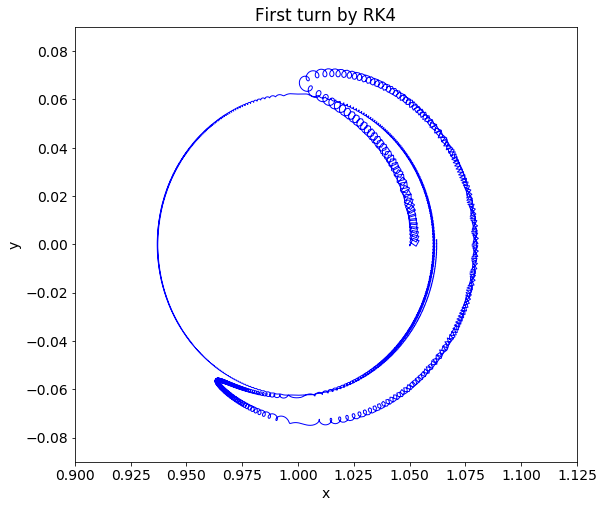

In [23]:
# Figure: particle orbit
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(9, 8))
#plt.subplot(121)
plt.plot( (zt[:, 0]**2 + zt[:,1]**2)**(1/2), zt[:, 2], '-b', linewidth=1)
plt.xlim(0.9, 1.125)
plt.ylim(-0.09, 0.09)
plt.title('First turn by ' + method)
plt.xlabel('x')
plt.ylabel('y')
#plt.subplot(122)
#plt.plot(z_store_B[1:, 0], z_store_B[1:, 1], '-b', linewidth=1)
#plt.xlim(-1.5, 1.5)
#plt.ylim(-1.5, 1.5)
#plt.title(str(turn_store + 1) + '-th turn by ' + method)
#plt.xlabel('x')
#plt.ylabel('y')

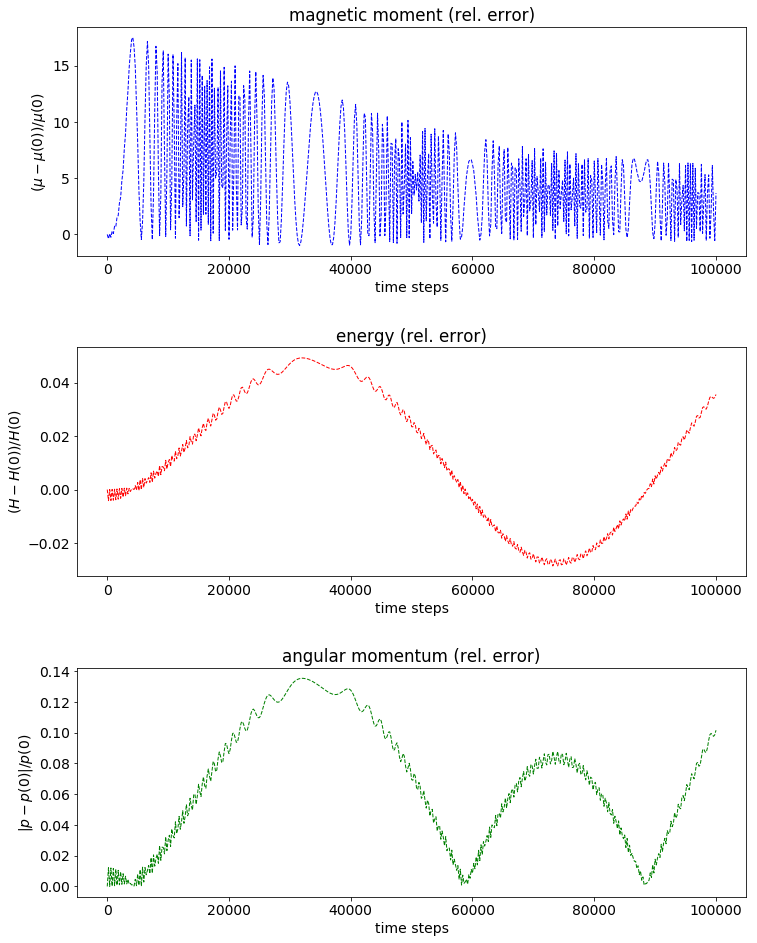

In [14]:
# Figure: conserved quantities
plt.figure(figsize=(12, 16))
plt.subplot(311)
plt.plot(np.arange(0, steps+1, 200), (mu[::200] - mu[0])/mu[0], '--b', linewidth=1, label='magnetic moment')
plt.xlabel('time steps')
plt.ylabel('$(\mu - \mu(0))/\mu(0)$')
plt.title('magnetic moment (rel. error)')
plt.subplot(312)
plt.plot(np.arange(0, steps+1, 200), (H[::200] - H[0])/H[0], '--r', linewidth=1, label='energy')
plt.xlabel('time steps')
plt.ylabel('$(H - H(0))/H(0)$')
plt.title('energy (rel. error)')
plt.subplot(313)
plt.plot(np.arange(0, steps+1, 200), np.abs(pxi[::200] - pxi[0])/pxi[0], '--g', linewidth=1, label='angular momentum')
plt.xlabel('time steps')
plt.ylabel('$|p - p(0)|/p(0)$')
plt.title('angular momentum (rel. error)')

plt.subplots_adjust(hspace=0.4)